In [2]:
import numpy as np
import scipy
import scipy.stats as sps
import scipy.fftpack as spfft
import scipy.signal as spsig
import matplotlib.pyplot as plt
import scipy.integrate as integrate
from scipy.integrate import quad
import scipy.fft as scft
import sys
import stingray as st

sys.path.insert(1, 'C:/Users/shash/UvA/Thesis/Project/MastersThesis/src/MastersThesis/scripts')

from General import *
from PowerSpec import *
from BiSpectra import *
from SimulatorFuncs import *

In [3]:
def get_indices_temp(freq, min, max):
    return np.argmin(np.abs(freq-min)), np.argmin(np.abs(freq-max))

def dbl_lorentz_fwhm_and_QPO(f, lor_rmssq1, f_cent1, fwhm1, lor_rmssq2, f_cent2, fwhm2, lor_rmssq3, f_cent3, fwhm3):
    powmod = lorentz_fwhm(f, lor_rmssq1, f_cent1, fwhm1) + lorentz_fwhm(f, lor_rmssq2, f_cent2, fwhm2) + lorentz_fwhm(f, lor_rmssq3, f_cent3, fwhm3)
    return powmod

# Checking whether the Bicoherence is the fraction of Power that is coupled



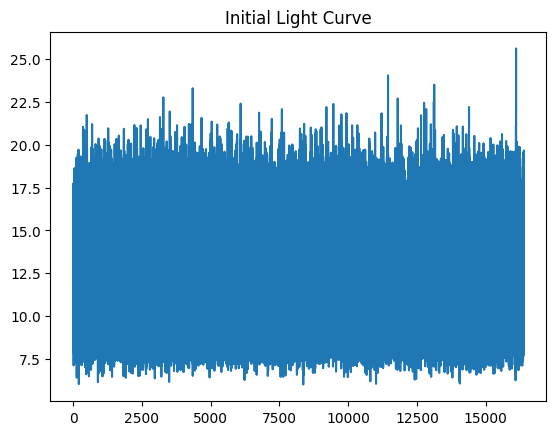

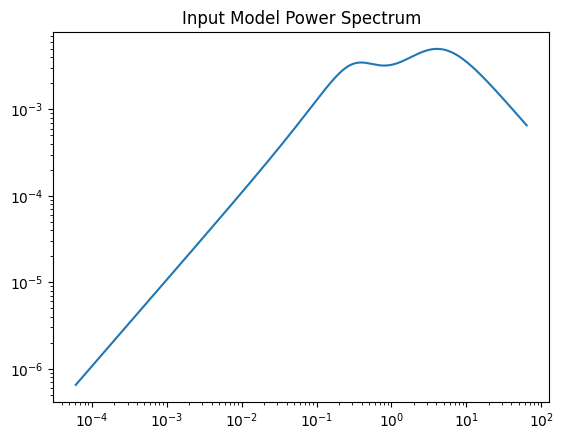

In [26]:
psmodel = dbl_lorentz_fwhm
# pspar = [.1, .05, 1.1, 0.07, 3, 8, 0.006, 2, 2*0.059]
pspar = [.01, .16, .58, 0.03, 0, 2*4.3] # Strong BBN
# pspar = [.005, .16, 2*.29, 0.007, 0, 2*4.3] # Weak BBN
# pspar = [0,0,0,0,0,0, 0.006, 2, 2*0.059]
# Simulated Light Curve Parameters
dt = 1/128 # Time bin size
ntimes = 262144 * 8 # Length of light curve 
expquery = 'y' # exponentiation to make the light curve flux distribution lognormal

# Cannot set rms using my newly defined dbl_lorentz_fwhm function!
rms = 0. # Set to 0 to not re-normalize

f_min = 1./(dt*ntimes) # The minimum frequency is 1/(duration of light curve)
f_max = 1/(2.*dt) # The maximum 'Nyquist' frequency is 1/(2*sampling-interval) (i.e. 1/(2*binsize)
params = tuple(pspar)

lc = simlc(dt, ntimes, expquery, rms, psmodel, pspar)

# To convert lc to 1s
# lc = lc/lc
lc *= 12
# lc = lc**2


time = np.linspace(start=dt, stop=(dt*ntimes), num=ntimes) # Set up times for plotting
minfreq = 1./(ntimes*dt)
freq = np.linspace(start=minfreq,stop=(minfreq*ntimes//2), num=ntimes//2)

plt.figure()
plt.plot(time,lc)
plt.title('Initial Light Curve')
plt.show()

plt.figure()
plt.plot(freq,freq*psmodel(freq,*pspar))
plt.yscale('log')
plt.xscale('log')
plt.title('Input Model Power Spectrum')
plt.show()

# print(np.mean(lc))

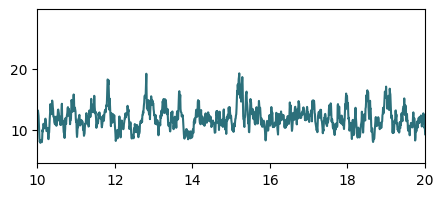

c:\Users\shash\UvA\Thesis\Project\MastersThesis\.venv\Lib\site-packages\stingray\lightcurve.py:329: UserWarning: On Windows, the size of an integer is 32 bits. To avoid integer overflow, I'm converting the input array to float
  warnings.warn(


[1.10276175e-02 1.13363523e-02 1.16271453e-02 1.18950021e-02
 1.21348966e-02 1.23419706e-02 1.25117528e-02 1.26882800e-02
 1.27630326e-02 1.27540886e-02 1.26982474e-02 1.25969258e-02
 1.23653760e-02 1.20494339e-02 1.17993833e-02 1.13775236e-02
 1.09145202e-02 1.05909421e-02 1.00939376e-02 9.59396822e-03
 9.10111849e-03 8.62302571e-03 8.16511245e-03 7.73091819e-03
 7.32246046e-03 6.81920770e-03 6.47260366e-03 6.15158196e-03
 5.76130400e-03 5.41111182e-03 5.17262911e-03 4.95317494e-03
 4.68764126e-03 4.45005378e-03 4.23740884e-03 4.04700141e-03
 3.87642423e-03 3.72355361e-03 3.58652878e-03 3.46372850e-03
 3.32810966e-03 3.21021196e-03 3.12735751e-03 3.03679310e-03
 2.95949511e-03 2.90653883e-03 2.85083276e-03 2.80633915e-03
 2.77284060e-03 2.74726862e-03 2.73862774e-03 2.74235083e-03
 2.76495568e-03 2.81050832e-03 2.88394455e-03 2.99255688e-03
 3.14713749e-03 3.36382970e-03 3.66716919e-03 4.09511170e-03
 4.70721418e-03 5.78132903e-03 7.46483863e-03 1.00238037e-02
 1.32965557e-02 1.553471

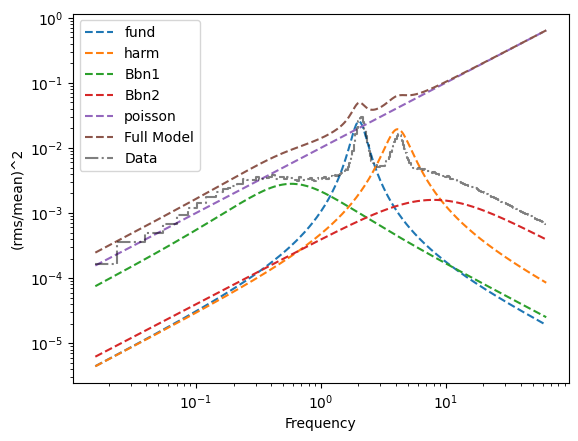

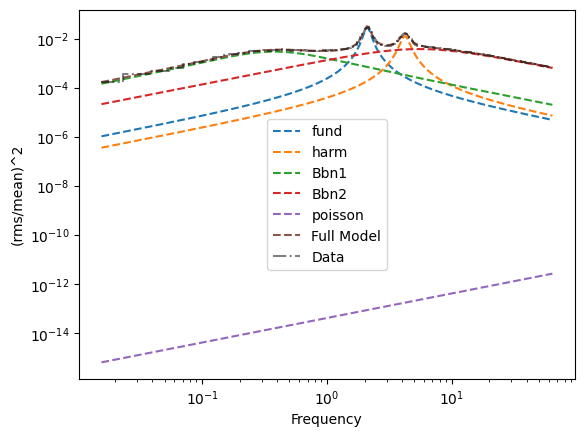

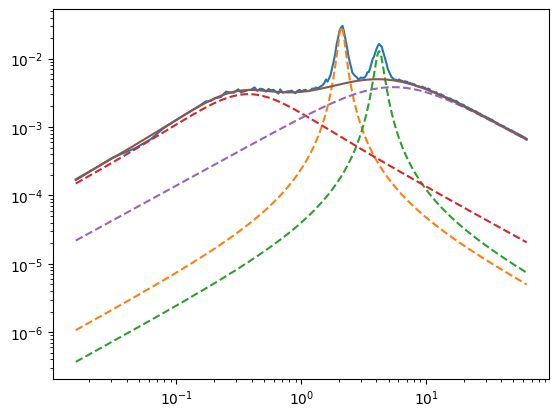

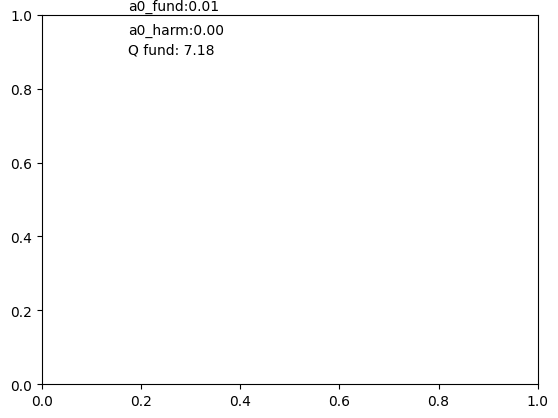

In [44]:
# Initial phase values for random walk
phi1_0 = 0.5*np.pi

# Amplitudes of modulating sinusoid
A1 = .14
A2 = .08
# A2 = 0
# Frequency of fundamental and harmonic
nu1 = 2.1
nu2 = 2 * nu1

# Phased difference b/w fundamental and harmonic
psi=.5 * np.pi * 0

a0 = 0.0081 # 0.0081 # 0.001 # 0.0001 # 0.00001 
nu0 = 0
hwhm = 0.2

a0 = 0.015 # 0.0081 # 0.001 # 0.0001 # 0.00001 
nu0 = 0
hwhm = 0.2

params_modulation = {'A1': 0.1,
             'A2': 0.07,
             'psi': 0.0*np.pi,
             'phi_0':0,
             'nu_f': nu1,
             'nu_h': nu2}


# Number of samples needed for the random walk
n_samples = len(time) 

phi_1 = np.cumsum(gen_stochastic_phi(a0=a0, hwhm=hwhm, nu0=nu0, dt=dt, ntimes=ntimes) - 1)
# phi_1 = phi_1/phi_1
phi_2 = np.cumsum(gen_stochastic_phi(a0=a0, hwhm=hwhm, nu0=nu0, dt=dt, ntimes=ntimes) - 1)
# plt.plot(range(n_samples), phi_1, color='tab:green')

# plt.xlabel("Step Number")
# plt.ylabel(r'$\phi$ (rad)')
# plt.title(r'Random walk taken by $\phi$')
# plt.show()

mod = modulation(nu1, nu2, phi_1, A1=A1, A2=A2, psi=psi, times=time)
# mod = modulation_uncorrelated(nu1, nu2, phi_1, phi2=phi_2, A1=A1, A2=A2, psi=psi, times=time)
modulated_ts = lc * mod
modulated_ts = modulate_lc(lc_times=time, lc_counts=lc, params=params_modulation, phi_stoch=phi_1)
# modulated_ts = np.random.poisson(modulated_ts)

plt.subplots(figsize=(5,2))

plt.plot(time, modulated_ts, label='Modulated Time Series', alpha=.9, c='#15616d')
# plt.plot(time, lc, label='Original Time Series')
# plt.title('A Section of the Modulated Light Curve')
# plt.legend()
plt.xlim(10,20)
plt.show()

lc_st = st.Lightcurve(time, modulated_ts, dt=dt)
avg_ps = st.AveragedPowerspectrum.from_lightcurve(lc_st, 64, norm='frac')
avg_ps = avg_ps.rebin_log(f=0.02)
pow_err = avg_ps.power_err


x_dat = avg_ps.freq
y_dat = avg_ps.power
tot_stacked = avg_ps.m

model, params = get_model_and_params_sim()
# poisson_init=0
# model, params = get_model_and_params_nobbn()
# params=fit.params
plot_model_dat(x_dat, y_dat, model, params, title=None, save_name=None, sub_poisson_noise=False, ylim=None, xlim=None)
fit = fit_powerspec(x_dat, y_dat, tot_stacked, model=model, params=params, plot_fit=False)
params=fit.params
plot_model_dat(x_dat, y_dat, model, params, title=None, save_name=None, sub_poisson_noise=False, ylim=None, xlim=None)
print(model.eval(fit.params, x=x_dat))
print(y_dat)
plt.show()

plt.plot(x_dat, y_dat * x_dat)
for mod in model.components:
    model_pow = mod.eval(fit.params, x=x_dat)
    if mod.prefix[:-1] != 'poisson':
        plt.plot(x_dat, (model_pow) * x_dat, linestyle='dashed', label=mod.prefix[:-1])
plt.plot(x_dat,x_dat*psmodel(x_dat,*pspar))

plt.xscale('log')
plt.yscale('log')
plt.show()


# a,b = get_indices_temp(avg_ps.freq, fund_min, fund_max)
# summed_power = np.sum(avg_ps.power[a:b+1])
# print(summed_power)

# plt.axvline(avg_ps.freq[a], c='grey', ls='--')
# plt.axvline(avg_ps.freq[b], c='grey', ls='--')
# plt.plot(avg_ps.freq, avg_ps.power * avg_ps.freq, '.')
# plt.axhline(avg_ps.power[5] * avg_ps.freq[5])
# plt.axvline(avg_ps.freq[11])
# plt.axvline(avg_ps.freq[5])
# plt.axvline(1)
# # plt.axvline(2)
# plt.xlim(1,6)
# plt.xscale('log')
# plt.yscale('log')
# # plt.gcf().figsize()
# plt.show()

Q_f = fit.params['fund_center'] / (2*fit.params['fund_sigma'])
Q_h = fit.params['harm_center'] / (2*fit.params['harm_sigma'])

plt.annotate(f'a0_fund:{fit.params["fund_amplitude"].value:.2f}', xy=(0.2, 0.85), xycoords='figure fraction')
plt.annotate(f'a0_harm:{fit.params["harm_amplitude"].value:.2f}', xy=(0.2, 0.80), xycoords='figure fraction')
plt.annotate(f'Q fund: {Q_f:.2f}', xy=(0.2, 0.76), xycoords='figure fraction')
# plt.ylim(1e-7, 1)
plt.show()

## Define frequency range within which we are integrating

In [45]:
# integral_min_freq = fit.params['fund_center'].value * 2 - 2 * fit.params['fund_sigma'].value
# integral_max_freq = fit.params['fund_center'].value * 2 + 2 * fit.params['fund_sigma'].value

# # integral_min_freq = fit.params['fund_center'].value * 2 - 2 * fit.params['fund_sigma'].value
# # integral_max_freq = 

# integral_min_psbin, integral_max_psbin = get_indices_temp(avg_ps.freq, integral_min_freq, integral_max_freq)

# int_power_total = sc.integrate.trapezoid(avg_ps.power[integral_min_psbin:integral_max_psbin], avg_ps.freq[integral_min_psbin:integral_max_psbin])


# # pspar = [.01, .16, 2*.29, 0.03, 0, 2*4.3] # Strong BBN

# pow_bbn1 = lorentz_fwhm(avg_ps.freq, .01, .16, 2*.29)
# pow_bbn2 = lorentz_fwhm(avg_ps.freq, 0.03, 0, 2*4.3)

# int_power_bbn1 = sc.integrate.trapezoid(pow_bbn1[integral_min_psbin:integral_max_psbin], avg_ps.freq[integral_min_psbin:integral_max_psbin])
# int_power_bbn2 = sc.integrate.trapezoid(pow_bbn2[integral_min_psbin:integral_max_psbin], avg_ps.freq[integral_min_psbin:integral_max_psbin])

# print('Integrated power in freq range:', int_power_total)
# print('Ratio:', 1 - (int_power_bbn1 + int_power_bbn2)/int_power_total)

# plt.errorbar(avg_ps.freq, avg_ps.power * avg_ps.freq, yerr=pow_err * avg_ps.freq, ecolor='grey', drawstyle='steps-mid', c='#15616d')

# plt.axvline(integral_min_freq)
# plt.axvline(integral_max_freq)

# plt.axvline(avg_ps.freq[integral_min_psbin], c='k', ls='dotted')
# plt.axvline(avg_ps.freq[integral_max_psbin], c='k', ls='dotted')

# plt.plot(avg_ps.freq, pow_bbn1 * avg_ps.freq)
# plt.plot(avg_ps.freq, pow_bbn2 * avg_ps.freq)
# plt.plot(freq,freq*psmodel(freq,*pspar), c='k')
# plt.yscale('log')
# plt.xscale('log')
# plt.xlim(1,5)

In [46]:
# plt.plot(freq_bspec, bicoherence[fund_bsbin, :], ds='steps-mid')
# plt.show()
# plt.plot(freq_bspec, avg_phase[fund_bsbin, :], ds='steps-mid')
# np.mean(avg_phase[fund_bsbin, :]/np.pi)

In [47]:
integral_min_freq = fit.params['fund_center'].value * 2 - 2 * fit.params['fund_sigma'].value
integral_max_freq = fit.params['fund_center'].value * 2 + 2 * fit.params['fund_sigma'].value

# integral_min_freq = fit.params['fund_center'].value * 2 - 2 * fit.params['fund_sigma'].value
# integral_max_freq = 

# integral_min_psbin, integral_max_psbin = get_indices_temp(avg_ps.freq, integral_min_freq, integral_max_freq)
# integral_min_psbin, integral_max_psbin = get_indices_temp(avg_ps.freq, freq_bspec[harm_bsbin] - df/2, freq_bspec[harm_bsbin] + df/2)

# int_power_total = sc.integrate.trapezoid(avg_ps.power[integral_min_psbin:integral_max_psbin], avg_ps.freq[integral_min_psbin:integral_max_psbin])
# print('Integrated power in freq range:', int_power_total)



# pow_bbn1 = lorentz_fwhm(avg_ps.freq, .01, .16, 2*.29)
# pow_bbn2 = lorentz_fwhm(avg_ps.freq, 0.03, 0, 2*4.3)

# int_power_bbn1 = sc.integrate.trapezoid(pow_bbn1[integral_min_psbin:integral_max_psbin], avg_ps.freq[integral_min_psbin:integral_max_psbin])
# int_power_bbn2 = sc.integrate.trapezoid(pow_bbn2[integral_min_psbin:integral_max_psbin], avg_ps.freq[integral_min_psbin:integral_max_psbin])

# print('Ratio:', 1 - (int_power_bbn1 + int_power_bbn2)/int_power_total)

# plt.errorbar(avg_ps.freq, avg_ps.power * avg_ps.freq, yerr=pow_err * avg_ps.freq, ecolor='grey', drawstyle='steps-mid', c='#15616d')

# plt.axvline(integral_min_freq)
# plt.axvline(integral_max_freq)

# plt.axvline(avg_ps.freq[integral_min_psbin], c='k', ls='dotted')
# plt.axvline(avg_ps.freq[integral_max_psbin], c='k', ls='dotted')

# plt.plot(avg_ps.freq, pow_bbn1 * avg_ps.freq)
# plt.plot(avg_ps.freq, pow_bbn2 * avg_ps.freq)

# plt.yscale('log')
# plt.xscale('log')
# plt.xlim(1,5)

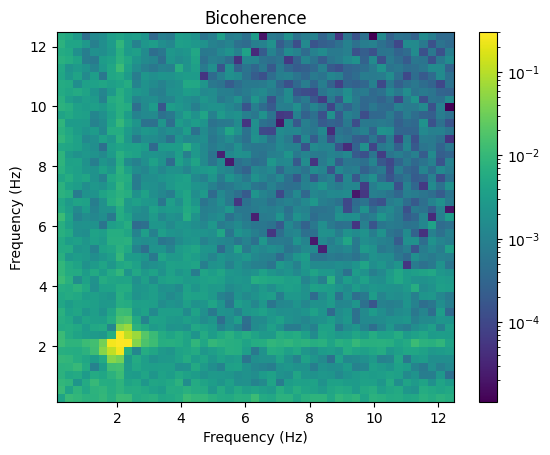

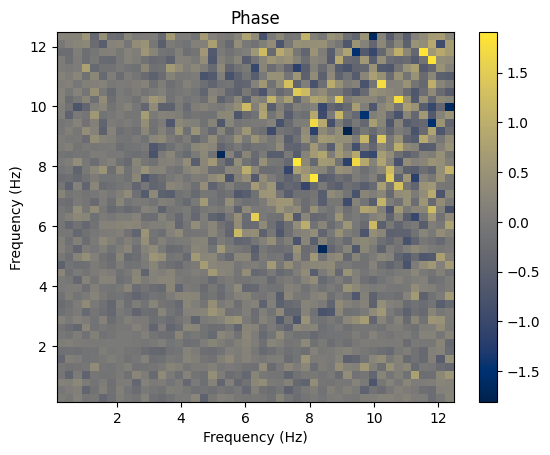

In [62]:
segsize = 8 *1/2.1
lc_gtis = lc_st.split_by_gti()
segmented_counts_bspec, segmented_times_bspec, discard = split_multiple_lc(lc_split=lc_gtis, segment_size=segsize, dt=dt)
freq_bspec, bicoherence, avg_phase = avg_bispec_wrapper(dt=dt, energy_range=[3,10], min_freq=0.01, split_counts=segmented_counts_bspec, plot_abs=True, plot_phase=True, norm='bic', savefig_name=None, max_freq=nu1*6, pois_correction=False)

In [57]:
paper_dir = '../../paper/'
data_dir = '../../data/'
save_dir = f'{paper_dir}Figures/BicoherenceResults/'

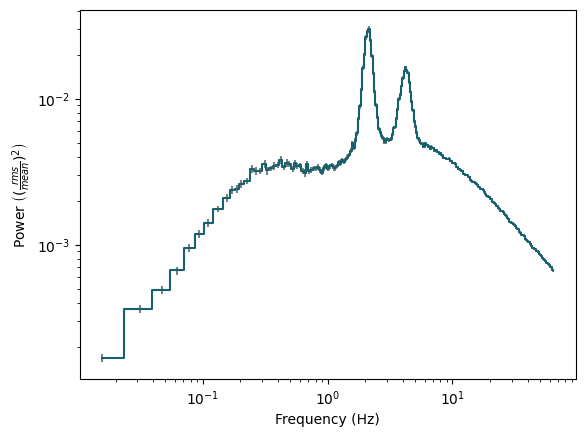

In [63]:
plt.errorbar(avg_ps.freq, avg_ps.power * avg_ps.freq, yerr=pow_err * avg_ps.freq, ecolor='grey', drawstyle='steps-mid', c='#15616d',  label='Simulated data')

plt.yscale('log')
plt.xscale('log')

plt.xlabel('Frequency (Hz)')
plt.ylabel(f'Power $\\left((\\frac{{rms}}{{mean}})^2\\right)$')

plt.savefig(f'{save_dir}PowerSpectrum.pdf', dpi=600)

Expected ratio of coupled power: 0.58
Calculated bicoherence: 0.30


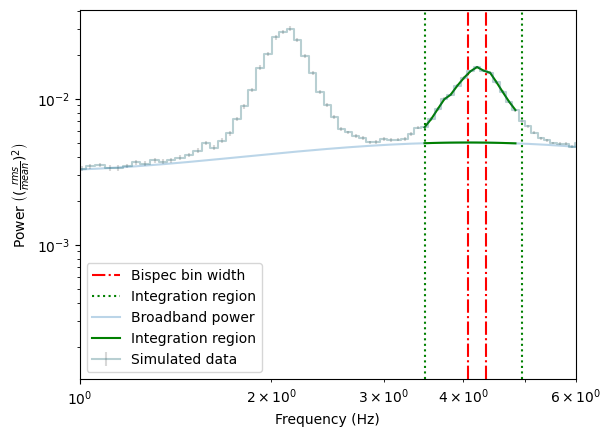

In [72]:
min_bsbin, max_bsbin = get_indices_temp(freq_bspec, integral_min_freq, integral_max_freq)
fund_bsbin, harm_bsbin = get_indices_temp(freq_bspec, nu1, nu2)

# Define integration region based on bin width of bispectrum
df = 4*fit.params['harm_sigma'].value
# df=.7

bspec_bw = freq_bspec[1] - freq_bspec[0]
# df = bspec_bw
integral_min_psbin, integral_max_psbin = get_indices_temp(avg_ps.freq, freq_bspec[harm_bsbin] - df/2, freq_bspec[harm_bsbin] + df/2)

int_power_total = sc.integrate.trapezoid(avg_ps.power[integral_min_psbin:integral_max_psbin], avg_ps.freq[integral_min_psbin:integral_max_psbin])

# Integrated in calculated range
# int_power_bbn1 = sc.integrate.trapezoid(pow_bbn1[integral_min_psbin:integral_max_psbin], avg_ps.freq[integral_min_psbin:integral_max_psbin])
# int_power_bbn2 = sc.integrate.trapezoid(pow_bbn2[integral_min_psbin:integral_max_psbin], avg_ps.freq[integral_min_psbin:integral_max_psbin])

int_bbn_pow = sc.integrate.trapezoid(psmodel(avg_ps.freq,*pspar)[integral_min_psbin:integral_max_psbin], avg_ps.freq[integral_min_psbin:integral_max_psbin])

# print('Integrated power in freq range:', int_power_total)
# print('Ratio:', 1 - (int_power_bbn1 + int_power_bbn2)/int_power_total)
print(f'Expected ratio of coupled power: {1 - int_bbn_pow/int_power_total:.2f}')

print(f'Calculated bicoherence: {bicoherence[fund_bsbin, fund_bsbin]:.2f}')

plt.axvline(freq_bspec[harm_bsbin] - bspec_bw/2, c='red', ls='-.', label='Bispec bin width')
plt.axvline(freq_bspec[harm_bsbin] + bspec_bw/2, c='red', ls='-.')

plt.errorbar(avg_ps.freq, avg_ps.power * avg_ps.freq, yerr=pow_err * avg_ps.freq, ecolor='grey', drawstyle='steps-mid', c='#15616d', alpha=.3, label='Simulated data')

plt.axvline(avg_ps.freq[integral_min_psbin], c='green', ls='dotted', label='Integration region')
plt.axvline(avg_ps.freq[integral_max_psbin], c='green', ls='dotted')

# plt.axvline(freq_bspec[min_bsbin], c='red', ls='-.')
# plt.axvline(freq_bspec[max_bsbin], c='red', ls='-.')

# plt.plot(avg_ps.freq, pow_bbn1 * avg_ps.freq)
# plt.plot(avg_ps.freq, pow_bbn2 * avg_ps.freq)
plt.plot(avg_ps.freq, avg_ps.freq*psmodel(avg_ps.freq,*pspar), alpha=.3, markersize=.4, label='Broadband power')

plt.plot(avg_ps.freq[integral_min_psbin:integral_max_psbin], (psmodel(avg_ps.freq,*pspar) * avg_ps.freq)[integral_min_psbin:integral_max_psbin], c='green', label='Integration region')
plt.plot(avg_ps.freq[integral_min_psbin:integral_max_psbin], (avg_ps.power * avg_ps.freq)[integral_min_psbin:integral_max_psbin], c='green')


plt.yscale('log')
plt.xscale('log')
plt.legend()

plt.xlabel('Frequency (Hz)')
plt.ylabel(f'Power $\\left((\\frac{{rms}}{{mean}})^2\\right)$')

plt.xlim(1,6)

plt.savefig(f'{save_dir}IntegrationRegion.pdf', dpi=600)

# Testing adding noise

In [2]:
psmodel = dbl_lorentz_fwhm
pspar = [.1, .05, 1.1, 0.07, 3, 8, 0.006, 2, 2*0.059]
pspar = [.01, .16, 2*.29, 0.03, 0, 2*4.3] # Strong BBN
# pspar = [.005, .16, 2*.29, 0.007, 0, 2*4.3] # Weak BBN
# pspar = [0,0,0,0,0,0, 0.006, 2, 2*0.059]
# Simulated Light Curve Parameters
dt = 1/128 # Time bin size
ntimes = 262144 * 8 # Length of light curve 
expquery = 'y' # exponentiation to make the light curve flux distribution lognormal

# Cannot set rms using my newly defined dbl_lorentz_fwhm function!
rms = 0. # Set to 0 to not re-normalize

f_min = 1./(dt*ntimes) # The minimum frequency is 1/(duration of light curve)
f_max = 1/(2.*dt) # The maximum 'Nyquist' frequency is 1/(2*sampling-interval) (i.e. 1/(2*binsize)
params = tuple(pspar)

lc = simlc(dt, ntimes, expquery, rms, psmodel, pspar)

# To convert lc to 1s
# lc = lc/lc
lc *= 12
# lc = lc**2


time = np.linspace(start=dt, stop=(dt*ntimes), num=ntimes) # Set up times for plotting
minfreq = 1./(ntimes*dt)
freq = np.linspace(start=minfreq,stop=(minfreq*ntimes//2), num=ntimes//2)

plt.figure()
plt.plot(time,lc)
plt.title('Initial Light Curve')
plt.show()

plt.figure()
plt.plot(freq,freq*psmodel(freq,*pspar))
plt.yscale('log')
plt.xscale('log')
plt.title('Input Model Power Spectrum')
plt.show()

# print(np.mean(lc))

NameError: name 'dbl_lorentz_fwhm' is not defined

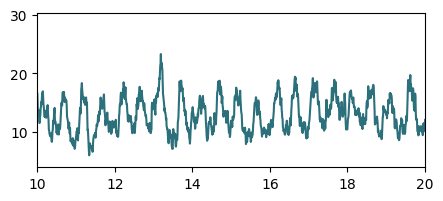

c:\Users\shash\AppData\Local\Programs\Python\Python311\Lib\site-packages\stingray\lightcurve.py:329: UserWarning: On Windows, the size of an integer is 32 bits. To avoid integer overflow, I'm converting the input array to float
  warnings.warn(


[1.25743916e-02 1.25556893e-02 1.24947169e-02 ... 8.99633677e-06
 8.99196829e-06 8.98760298e-06]
[9.31786688e-03 1.03168485e-02 9.62696084e-03 ... 8.65168065e-06
 8.97994203e-06 9.59554736e-06]


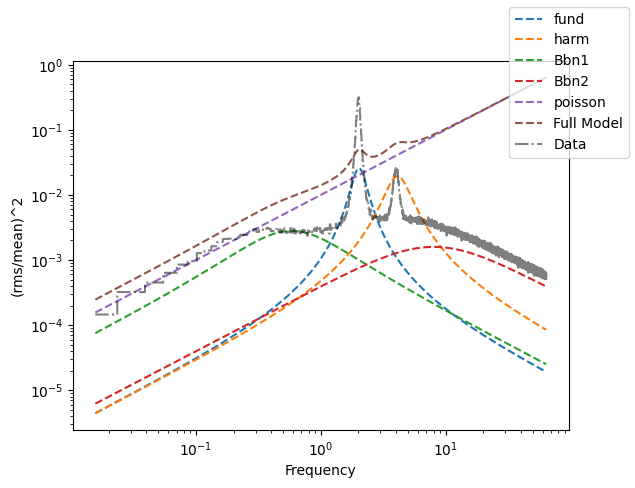

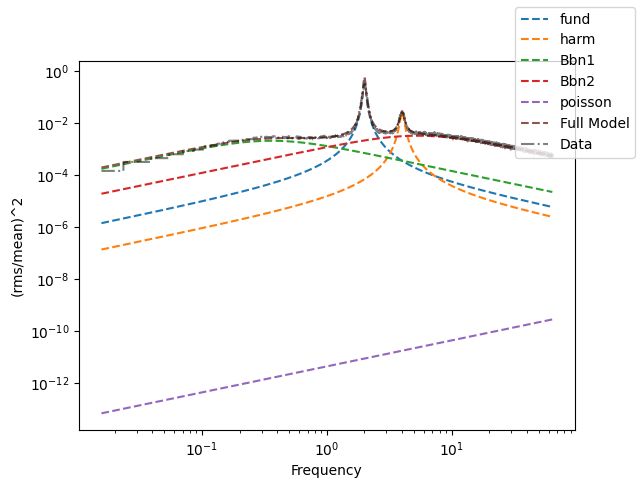

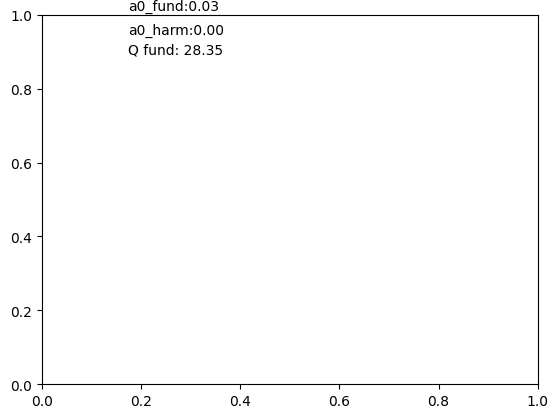

In [73]:
# Initial phase values for random walk
phi1_0 = 0

# Amplitudes of modulating sinusoid
A1 = .1 * 30
A2 = .03 * 30
# A2 = 0
# Frequency of fundamental and harmonic
nu1 = 2
nu2 = 2 * nu1

# Phased difference b/w fundamental and harmonic
psi=.5 * np.pi * 0

a0 = 0.0081 # 0.0081 # 0.001 # 0.0001 # 0.00001 
nu0 = 0
hwhm = 0.2


# Number of samples needed for the random walk
n_samples = len(time) 

phi_1 = np.cumsum(gen_stochastic_phi(a0=a0, hwhm=hwhm, nu0=nu0, dt=dt, ntimes=ntimes) - 1)
# phi_1 = phi_1/phi_1
phi_2 = np.cumsum(gen_stochastic_phi(a0=a0, hwhm=hwhm, nu0=nu0, dt=dt, ntimes=ntimes) - 1)
# plt.plot(range(n_samples), phi_1, color='tab:green')

# plt.xlabel("Step Number")
# plt.ylabel(r'$\phi$ (rad)')
# plt.title(r'Random walk taken by $\phi$')
# plt.show()

mod = modulation(nu1, nu2, phi_1, A1=A1, A2=A2, psi=psi, times=time)
# mod = modulation_uncorrelated(nu1, nu2, phi_1, phi2=phi_2, A1=A1, A2=A2, psi=psi, times=time)
modulated_ts = lc + mod
# modulated_ts = np.random.poisson(modulated_ts)

plt.subplots(figsize=(5,2))

plt.plot(time, modulated_ts, label='Modulated Time Series', alpha=.9, c='#15616d')
# plt.plot(time, lc, label='Original Time Series')
# plt.title('A Section of the Modulated Light Curve')
# plt.legend()
plt.xlim(10,20)
plt.show()

lc_st = st.Lightcurve(time, modulated_ts, dt=dt)
avg_ps = st.AveragedPowerspectrum.from_lightcurve(lc_st, 64, norm='frac')
# avg_ps = avg_ps.rebin_log(f=0.02)
pow_err = avg_ps.power_err


x_dat = avg_ps.freq
y_dat = avg_ps.power
tot_stacked = avg_ps.m

model, params = get_model_and_params_sim()
# poisson_init=0
# model, params = get_model_and_params_nobbn()
# params=fit.params
plot_model_dat(x_dat, y_dat, model, params, title=None, save_name=None, sub_poisson_noise=False, ylim=None, xlim=None)
fit = fit_powerspec(x_dat, y_dat, tot_stacked, model=model, params=params, plot_fit=False)
params=fit.params
plot_model_dat(x_dat, y_dat, model, params, title=None, save_name=None, sub_poisson_noise=False, ylim=None, xlim=None)
print(model.eval(fit.params, x=x_dat))
print(y_dat)
plt.show()


# a,b = get_indices_temp(avg_ps.freq, fund_min, fund_max)
# summed_power = np.sum(avg_ps.power[a:b+1])
# print(summed_power)

# plt.axvline(avg_ps.freq[a], c='grey', ls='--')
# plt.axvline(avg_ps.freq[b], c='grey', ls='--')
# plt.plot(avg_ps.freq, avg_ps.power * avg_ps.freq, '.')
# plt.axhline(avg_ps.power[5] * avg_ps.freq[5])
# plt.axvline(avg_ps.freq[11])
# plt.axvline(avg_ps.freq[5])
# plt.axvline(1)
# # plt.axvline(2)
# plt.xlim(1,6)
# plt.xscale('log')
# plt.yscale('log')
# # plt.gcf().figsize()
# plt.show()

Q_f = fit.params['fund_center'] / (2*fit.params['fund_sigma'])
Q_h = fit.params['harm_center'] / (2*fit.params['harm_sigma'])

plt.annotate(f'a0_fund:{fit.params["fund_amplitude"].value:.2f}', xy=(0.2, 0.85), xycoords='figure fraction')
plt.annotate(f'a0_harm:{fit.params["harm_amplitude"].value:.2f}', xy=(0.2, 0.80), xycoords='figure fraction')
plt.annotate(f'Q fund: {Q_f:.2f}', xy=(0.2, 0.76), xycoords='figure fraction')
# plt.ylim(1e-7, 1)
plt.show()

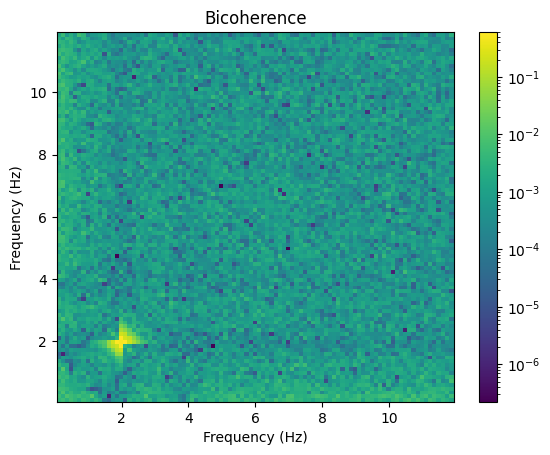

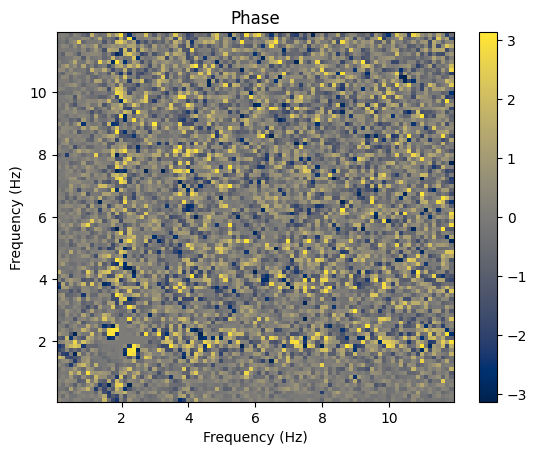

In [76]:
segsize = 8
lc_gtis = lc_st.split_by_gti()
segmented_counts_bspec, segmented_times_bspec, discard = split_multiple_lc(lc_split=lc_gtis, segment_size=segsize, dt=dt)
freq_bspec, bicoherence, avg_phase = avg_bispec_wrapper(dt=dt, energy_range=[3,10], min_freq=0.01, split_counts=segmented_counts_bspec, plot_abs=True, plot_phase=True, bicoherence=True, savefig_name=None, max_freq=nu1*6, pois_correction=False)